In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/risk_factors_cervical_cancer.csv')
print(data.shape)
data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
data = data.replace('?', nm.nan)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
data = data.apply(pd.to_numeric)
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
data = data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis='columns')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
'''
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].mean())
data['Number of sexual partners'].isnull().any()

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].mean())
data['First sexual intercourse'].isnull().any()

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].mean())
data['Num of pregnancies'].isnull().any()

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].mean())
data['Smokes'].isnull().any()

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].mean())
data['Smokes (packs/year)'].isnull().any()

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].mean())
data['Hormonal Contraceptives'].isnull().any()

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].mean())
data['Hormonal Contraceptives (years)'].isnull().any()

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].mean())
data['STDs (number)'].isnull().any()

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].mean())
data['STDs:condylomatosis'].isnull().any()

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].mean())
data['STDs:cervical condylomatosis'].isnull().any()

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].mean())
data['STDs:vaginal condylomatosis'].isnull().any()

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].mean())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].mean())
data['STDs:syphilis'].isnull().any()


data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].mean())
data['STDs:pelvic inflammatory disease'].isnull().any()

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].mean())
data['STDs:genital herpes'].isnull().any()

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].mean())
data['STDs:molluscum contagiosum'].isnull().any()

data['STDs:AIDS'] =data['STDs:AIDS'].fillna(data['STDs:AIDS'].mean())
data['STDs:AIDS'].isnull().any()

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].mean())
data['STDs:HIV'].isnull().any()

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].mean())
data['STDs:Hepatitis B'].isnull().any()

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].mean())
data['STDs:HPV'].isnull().any()
'''

"\ndata['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].mean())\ndata['Number of sexual partners'].isnull().any()\n\ndata['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].mean())\ndata['First sexual intercourse'].isnull().any()\n\ndata['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].mean())\ndata['Num of pregnancies'].isnull().any()\n\ndata['Smokes'] = data['Smokes'].fillna(data['Smokes'].mean())\ndata['Smokes'].isnull().any()\n\ndata['Smokes (years)'] = data['Smokes (years)'].fillna(1)\ndata['Smokes (years)'].isnull().any()\n\ndata['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].mean())\ndata['Smokes (packs/year)'].isnull().any()\n\ndata['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].mean())\ndata['Hormonal Contraceptives'].isnull().any()\n\ndata[

In [ ]:
data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Smokes (packs/year)'].isnull().any()

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

data['IUD (years)'] = data['IUD (years)'].fillna(1)
data['IUD (years)'].isnull().any()

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()


data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

data['STDs:AIDS'] =data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

False

In [ ]:
data.isnull().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [ ]:
x= data.iloc[:, 0:29]
y= data.iloc[:, 33]
x=pd.DataFrame(x)

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k = 20)
X_kbest_features = chi2_features.fit_transform(x,y)
print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
'''

"\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\nchi2_features = SelectKBest(chi2, k = 20)\nX_kbest_features = chi2_features.fit_transform(x,y)\nprint('Original feature number:', x.shape[1])\nprint('Reduced feature number:', X_kbest_features.shape[1])\n"

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=20)
X_kbest_features = chi2_features.fit_transform(x, y)

# Get the mask of selected features
mask = chi2_features.get_support()

# Get the names of the original features
feature_names = list(x.columns)

# Get the names of the selected features
selected_feature_names = [feature_names[i] for i, m in enumerate(mask) if m]

# Print the selected feature names
print('Selected feature names:', selected_feature_names)
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create a SelectKBest object with the chi2 scoring function and k=20
k_best = SelectKBest(chi2, k=15)

# Fit the object to the data and transform the data to the k best features
X_kbest = k_best.fit_transform(x, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = x.columns[selected_indices]

# Get the chi2 scores of the selected features
chi2_scores = k_best.scores_[selected_indices]

# Print the selected features along with their chi2 scores
for feature_name, score in zip(selected_feature_names, chi2_scores):
    print(f"{feature_name}: {score}")

Age: 7.224830880374528
Smokes (years): 43.794964783002584
Smokes (packs/year): 5.625541091273241
Hormonal Contraceptives (years): 47.50377942975268
IUD: 2.7188975078395785
IUD (years): 3.3753000482847413
STDs (number): 16.50066948192399
STDs:condylomatosis: 6.617434620174349
STDs:vulvo-perineal condylomatosis: 6.98063077413189
STDs:genital herpes: 14.600000000000001
STDs:HIV: 13.698630136986303
STDs: Number of diagnosis: 8.521972602739726
Dx:Cancer: 21.747945205479457
Dx:CIN: 10.873972602739729
Dx:HPV: 21.747945205479457


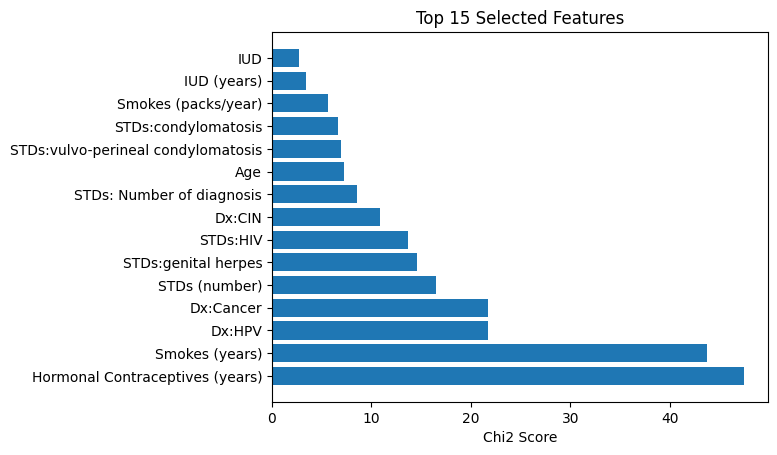

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

selected_indices = k_best.get_support(indices=True)
selected_feature_names = x.columns[selected_indices]
chi2_scores = k_best.scores_[selected_indices]
sorted_indices = np.argsort(chi2_scores)[::-1]
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_scores = chi2_scores[sorted_indices]

# plot
fig, ax = plt.subplots()
ax.barh(sorted_feature_names, sorted_scores)
ax.set_xlabel('Chi2 Score')
ax.set_title('Top 15 Selected Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2)
print(x_test.shape)
print(x_train.shape)

(172, 15)
(686, 15)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X_kbest, y, cv=5)  # perform 5-fold cross-validation
print("Cross-validation accuracy:", scores.mean())

# train and test the model on the whole dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print("Training accuracy :", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Cross-validation accuracy: 0.9335577315381476
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       162
           1       0.00      0.00      0.00        10

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.49       172
weighted avg       0.89      0.94      0.91       172

[[162   0]
 [ 10   0]]
Accuracy: 0.941860
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model = GaussianNB()  
scores = cross_val_score(model, X_kbest, y, cv=5)  # perform 5-fold cross-validation
print("Cross-validation accuracy:", scores.mean())

# train and test the model on the whole dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print("Training accuracy :", model.score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Cross-validation accuracy: 0.8566911464708282
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       162
           1       0.39      0.70      0.50        10

    accuracy                           0.92       172
   macro avg       0.68      0.82      0.73       172
weighted avg       0.95      0.92      0.93       172

[[151  11]
 [  3   7]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X_kbest, y, cv=5)  # perform 5-fold cross-validation
print("Cross-validation accuracy:", scores.mean())

# train and test the model on the whole dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print("Training accuracy :", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy: 0.9335577315381476
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       162
           1       0.00      0.00      0.00        10

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.49       172
weighted avg       0.89      0.94      0.91       172

[[162   0]
 [ 10   0]]
Accuracy: 0.941860
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model =SVC(kernel='linear', random_state=5,coef0=0.0, shrinking=True, probability=False)  
#(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
scores = cross_val_score(model, X_kbest, y, cv=5)  # perform 5-fold cross-validation
print("Cross-validation accuracy:", scores.mean())

# train and test the model on the whole dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print("Training accuracy :", model.score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Cross-validation accuracy: 0.9358969128246974
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       162
           1       0.00      0.00      0.00        10

    accuracy                           0.94       172
   macro avg       0.47      0.50      0.49       172
weighted avg       0.89      0.94      0.91       172

[[162   0]
 [ 10   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

mode = DecisionTreeClassifier()
scores = cross_val_score(model, X_kbest, y, cv=5)  # perform 5-fold cross-validation
print("Cross-validation accuracy:", scores.mean())

# train and test the model on the whole dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print("Training accuracy :", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Cross-validation accuracy: 0.9358969128246974
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       156
           1       0.00      0.00      0.00        16

    accuracy                           0.91       172
   macro avg       0.45      0.50      0.48       172
weighted avg       0.82      0.91      0.86       172

[[156   0]
 [ 16   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
